Etude de la matrice de rotation du skate:
https://thepoorengineer.com/en/quaternion/

In [22]:
import os
import sys

print(sys.path)
if '\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\' not in sys.path:
    sys.path.append('\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\')
    print("ok")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import movuinos.SkateboardXXX3000DataSet as sk
import tools.display_functions as df
import tools.signal_analysis as sa
import tools.integratino_functions as ifct
import tools.correction_interpolation as ci

import models.detection.detection_energy as dt
import models.classification.reference_tricks_classification as rtc

from pathlib import Path

from tools.quaternion import Quaternion#, get_euler_angles, get_rot_mat

['c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\study', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv', '', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\win32', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\Pythonwin', '\\Users\\Pierre\\

In [23]:
tricks_path = "../../../06_Data/Isolated_Tricks/pop_shovit/pop_shovit_success_3.csv"

print(Path(tricks_path).exists())
print(Path(tricks_path).glob(pattern="*"))
#--- Opening file ---
print("Opening : " + tricks_path)
trick = sk.SkateboardXXX3000DataSet(tricks_path)

True
<generator object Path.glob at 0x000002423B9BE3B0>
Opening : ../../../06_Data/Isolated_Tricks/pop_shovit/pop_shovit_success_3.csv
Reading : ../../../06_Data/Isolated_Tricks/pop_shovit/pop_shovit_success_3.csv


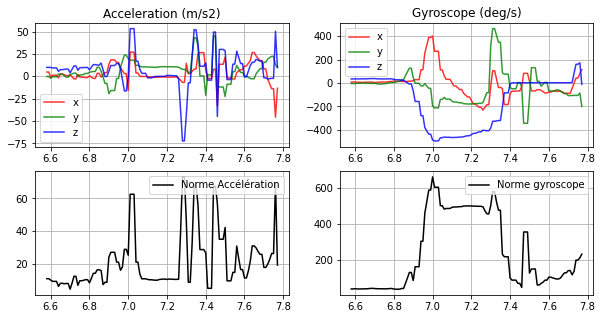

In [24]:
plt.figure(figsize=(10,5))
trick.dispRawData()

[-84.79775368   6.30253575   2.29183118]
[ 0.08035573 -0.06256386  0.30239898 -0.99601836]
[[-1.07312644  0.12223307  0.17322848]
 [-0.19791006 -0.89806463 -0.59233514]
 [ 0.07603052 -0.61244459  0.90315024]]
[[-1.07312644  0.12223307  0.17322848]
 [-0.19791006 -0.89806463 -0.59233514]
 [ 0.07603052 -0.61244459  0.90315024]]


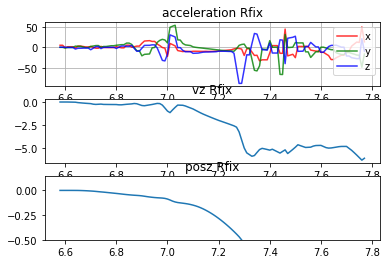

(120, 3, 3)


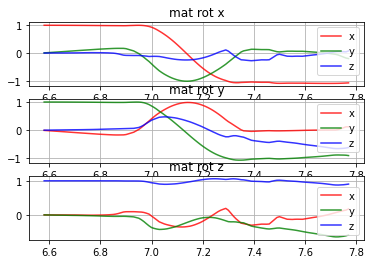

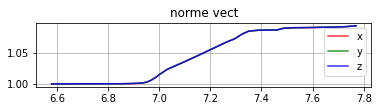

In [25]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
a_fixes=[]
N=[]
q=[]
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)

    rot =quaternion.get_rot_mat()
    q.append(rot.T)
    n=np.linalg.norm(rot,axis=1)
    N.append(n)
    a_fixe=np.matmul(rot.T, trick.acceleration[:,i])
    a_fixe[2]-=10
    a_fixes.append(a_fixe)

print(quaternion.q)
print(quaternion.get_rot_mat())

print(rot)
a_fixes=np.array(a_fixes)
# a_fixes=trick.acceleration
vz_fixes=ifct.EulerIntegration(a_fixes[:,2],trick.Te)
posz_fixes=ifct.EulerIntegration(vz_fixes,trick.Te)

vy_fixes=ifct.EulerIntegration(a_fixes[:,1],trick.Te)
posy_fixes=ifct.EulerIntegration(vy_fixes,trick.Te)

vx_fixes=ifct.EulerIntegration(a_fixes[:,0],trick.Te)
posx_fixes=ifct.EulerIntegration(vx_fixes,trick.Te)

df.plotVector(trick.time,a_fixes,"acceleration Rfix",311)
plt.subplot(312)
plt.plot(trick.time,vz_fixes[:])
plt.title("vz Rfix")
plt.subplot(313)
plt.plot(trick.time,posz_fixes[:])
plt.title("posz Rfix")
plt.ylim(ymin=-0.5)
plt.show()

N=np.array(N)
q=np.array(q)
print(q.shape)
df.plotVector(trick.time, q[:,0],"mat rot x",311)
df.plotVector(trick.time, q[:,1],"mat rot y",312)
df.plotVector(trick.time, q[:,2],"mat rot z",313)
plt.show()

df.plotVector(trick.time,N,"norme vect",311)
plt.show()